In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style='whitegrid')

In [3]:
a = np.array([
    [1625, 5],
    [1022, 11]
])
a

array([[1625,    5],
       [1022,   11]])

In [5]:
stats.chi2_contingency(a)

(4.881662029541069,
 0.027143470897616286,
 1,
 array([[1620.20653398,    9.79346602],
        [1026.79346602,    6.20653398]]))

In [6]:
a = np.array([
    [10, 10],
    [10, 10]
])
stats.chi2_contingency(a)

(0.0,
 1.0,
 1,
 array([[10., 10.],
        [10., 10.]]))

In [123]:
a = np.array([
    [20, 0],
    [0, 20]
])
stats.chi2_contingency(a, correction=False)

(40.0,
 2.5396285894708634e-10,
 1,
 array([[10., 10.],
        [10., 10.]]))

In [9]:
a = np.array([
    [10, 20], # Курят
    [30, 60] # Не курят
])
stats.chi2_contingency(a)

(0.0,
 1.0,
 1,
 array([[10., 20.],
        [30., 60.]]))

In [19]:
a = np.array([
    [25, 75], # Курят
    [75, 25] # Не курят
])
c1, _, _, _ = stats.chi2_contingency(a)
n1 = a.sum()
c1, n1

(48.02, 200)

In [20]:
a = np.array([
    [5, 15], # Курят
    [15, 5] # Не курят
])
c2 , _, _, _ = stats.chi2_contingency(a)
n2 = a.sum()

In [21]:
c2, n2

(8.1, 40)

# Мера связи Пирсона и Крамера

In [22]:
P1 = np.sqrt(c1 / (c1 + n1))
P2 = np.sqrt(c2 / (c2 + n2))
P1, P2

(0.44001524777298334, 0.41036467732879783)

In [24]:
C1 = np.sqrt(c1 / (n1 * min((2-1), (2-1))))
C1

0.49

In [25]:
C2 = np.sqrt(c2 / (n2 * min((2-1), (2-1))))

In [26]:
C2

0.45

# Crosstab & cut

In [27]:
df = pd.read_csv('data/smoking.csv', delimiter=';')
df.head(10)

,Возраст,Пол,Должность,Курение
0,55,М,Ст. Менеджер,Да
1,28,Ж,Мл. Менеджер,Нет
2,27,М,Мл. Рабочий,Да
3,36,М,Ст. Рабочий,Да
4,50,Ж,Мл. Менеджер,Да
5,44,Ж,Мл. Менеджер,Нет
6,42,Ж,Ст. Рабочий,Нет
7,38,М,Ст. Менеджер,Да
8,45,Ж,Мл. Рабочий,Нет
9,39,Ж,Ст. Рабочий,Нет


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Возраст    31 non-null     int64 
 1   Пол        31 non-null     object
 2   Должность  31 non-null     object
 3   Курение    31 non-null     object
dtypes: int64(1), object(3)
memory usage: 684.0+ bytes


In [29]:
df_sex_smoke = pd.crosstab(df['Пол'], df['Курение'])
df_sex_smoke

Курение,Да,Нет
Пол,,
Ж,3,11
М,13,4


In [34]:
c1, _, _, _ = stats.chi2_contingency(df_sex_smoke)
n1 = len(df)
c1, n1

(7.23998161764706, 31)

In [35]:
P = np.sqrt(c1 / (c1 + n1))
P

0.4351208501507357

In [36]:
df_sex_smoke = pd.crosstab(df['Должность'], df['Курение'])
df_sex_smoke

Курение,Да,Нет
Должность,,
Мл. Менеджер,4,3
Мл. Рабочий,3,4
Ст. Менеджер,4,1
Ст. Рабочий,5,7


In [37]:
stats.chi2_contingency(df_sex_smoke)

(2.389275793650794,
 0.4956340523978574,
 3,
 array([[3.61290323, 3.38709677],
        [3.61290323, 3.38709677],
        [2.58064516, 2.41935484],
        [6.19354839, 5.80645161]]))

In [40]:
df['Должность_общая'] = df['Должность'].str.split(expand=True)[1]
df.head()

,Возраст,Пол,Должность,Курение,Должность_общая
0,55,М,Ст. Менеджер,Да,Менеджер
1,28,Ж,Мл. Менеджер,Нет,Менеджер
2,27,М,Мл. Рабочий,Да,Рабочий
3,36,М,Ст. Рабочий,Да,Рабочий
4,50,Ж,Мл. Менеджер,Да,Менеджер


In [41]:
df_smoke = pd.crosstab(df['Должность_общая'], df['Курение'])
df_smoke

Курение,Да,Нет
Должность_общая,,
Менеджер,8,4
Рабочий,8,11


In [42]:
stats.chi2_contingency(df_smoke)

(0.9292351973684212,
 0.3350617374441954,
 1,
 array([[6.19354839, 5.80645161],
        [9.80645161, 9.19354839]]))

In [46]:
a = np.array([
    [80, 40],
    [80, 110]
])
stats.chi2_contingency(a)

(16.79621299342105,
 4.1616271427167786e-05,
 1,
 array([[61.93548387, 58.06451613],
        [98.06451613, 91.93548387]]))

In [43]:
df['Должность_стмл'] = df['Должность'].str.split(expand=True)[0]
df.head()

,Возраст,Пол,Должность,Курение,Должность_общая,Должность_стмл
0,55,М,Ст. Менеджер,Да,Менеджер,Ст.
1,28,Ж,Мл. Менеджер,Нет,Менеджер,Мл.
2,27,М,Мл. Рабочий,Да,Рабочий,Мл.
3,36,М,Ст. Рабочий,Да,Рабочий,Ст.
4,50,Ж,Мл. Менеджер,Да,Менеджер,Мл.


In [47]:
df_smoke = pd.crosstab(df['Должность_стмл'], df['Курение'])
df_smoke

Курение,Да,Нет
Должность_стмл,,
Мл.,7,7
Ст.,9,8


In [48]:
stats.chi2_contingency(df_smoke)

(0.03921130952380946,
 0.8430306226434658,
 1,
 array([[7.22580645, 6.77419355],
        [8.77419355, 8.22580645]]))

In [52]:
a = np.array([
    [10, 4],
    [10, 7]
])
b = np.array([
    [7, 7], 
    [8, 9]
])

In [53]:
stats.chi2_contingency(a)

(0.12447956455309381,
 0.7242259260566306,
 1,
 array([[ 9.03225806,  4.96774194],
        [10.96774194,  6.03225806]]))

In [54]:
stats.chi2_contingency(b)

(0.03921130952380946,
 0.8430306226434658,
 1,
 array([[6.77419355, 7.22580645],
        [8.22580645, 8.77419355]]))

In [62]:
a = np.array([
    [15.5, 0],
    [0, 15.5]
])
b = np.array([
    [0, 14], 
    [17, 0]
])

In [63]:
c, _, _, _ = stats.chi2_contingency(a)
n = a.sum()
c, n

(27.129032258064516, 31.0)

In [64]:
P = np.sqrt(c / (c + n))
P

0.683157128775741

In [65]:
C = np.sqrt(c / (n * min((2 - 1), (2 - 1))))
C

0.9354838709677419

In [57]:
stats.chi2_contingency(b)

(27.09366834969282,
 1.938317612315811e-07,
 1,
 array([[7.67741935, 6.32258065],
        [9.32258065, 7.67741935]]))

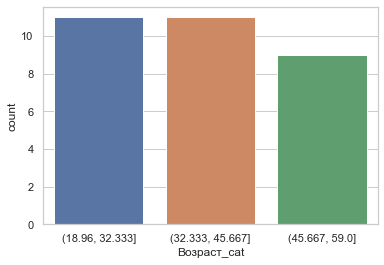

In [51]:
# Equal-width
df['Возраст_cat'] = pd.cut(df['Возраст'], bins=3)
sns.countplot(df['Возраст_cat'])

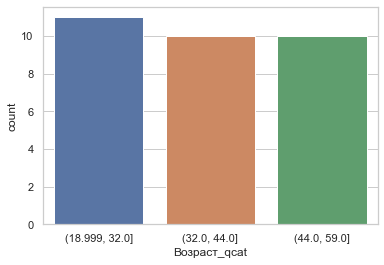

In [67]:
# Equal-height
df['Возраст_qcat'] = pd.qcut(df['Возраст'], 3)
sns.countplot(df['Возраст_qcat'])

# Пример

In [79]:
age = np.random.randint(20, 70, 40)
age

array([43, 22, 23, 30, 22, 58, 34, 20, 51, 49, 30, 50, 48, 41, 25, 69, 48,
       33, 37, 55, 22, 65, 66, 27, 32, 39, 25, 21, 55, 58, 69, 36, 31, 22,
       26, 30, 32, 29, 52, 69])

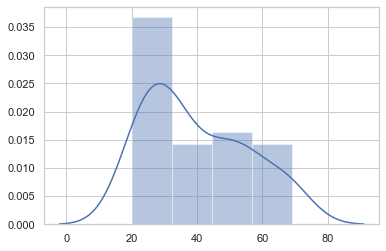

In [80]:
sns.distplot(age)

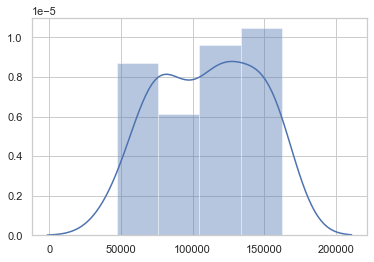

In [81]:
salary = 150_000 - 150*(age - 45)**2 + np.random.normal(0, 10000, size=age.size)
sns.distplot(salary)

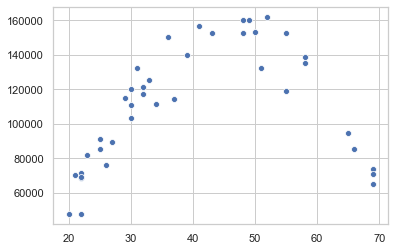

In [82]:
sns.scatterplot(age, salary)

In [84]:
stats.spearmanr(age, salary)

SpearmanrResult(correlation=0.4549939264140251, pvalue=0.0031796832549959124)

In [114]:
age_cat = pd.qcut(age, 3)
sal_cat = pd.qcut(salary, 2)

In [115]:
age_cat

[(30.0, 48.0], (19.999, 30.0], (19.999, 30.0], (19.999, 30.0], (19.999, 30.0], ..., (19.999, 30.0], (30.0, 48.0], (19.999, 30.0], (48.0, 69.0], (48.0, 69.0]]
Length: 40
Categories (3, interval[float64]): [(19.999, 30.0] < (30.0, 48.0] < (48.0, 69.0]]

In [116]:
sal_cat

[(114762.308, 162170.185], (47517.675, 114762.308], (47517.675, 114762.308], (114762.308, 162170.185], (47517.675, 114762.308], ..., (47517.675, 114762.308], (114762.308, 162170.185], (114762.308, 162170.185], (114762.308, 162170.185], (47517.675, 114762.308]]
Length: 40
Categories (2, interval[float64]): [(47517.675, 114762.308] < (114762.308, 162170.185]]

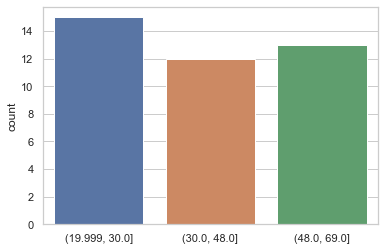

In [117]:
sns.countplot(age_cat)

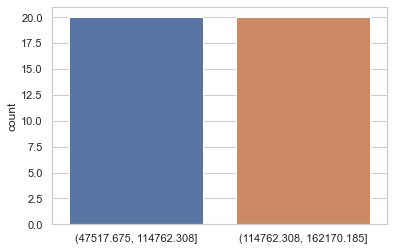

In [118]:
sns.countplot(sal_cat)

In [119]:
df=  pd.DataFrame(np.vstack([age_cat, sal_cat]).T, columns=['Age', 'Salary'])
df.head()

,Age,Salary
0,"(30.0, 48.0]","(114762.308, 162170.185]"
1,"(19.999, 30.0]","(47517.675, 114762.308]"
2,"(19.999, 30.0]","(47517.675, 114762.308]"
3,"(19.999, 30.0]","(114762.308, 162170.185]"
4,"(19.999, 30.0]","(47517.675, 114762.308]"


In [120]:
stats.chi2_contingency(pd.crosstab(df['Age'], df['Salary']))

(14.092307692307692,
 0.000870751569584294,
 2,
 array([[7.5, 7.5],
        [6. , 6. ],
        [6.5, 6.5]]))

# Пример

In [127]:
a = np.array([
    [165, 185],
    [168, 92],
    [115, 105],
    [32, 38]
])
a

array([[165, 185],
       [168,  92],
       [115, 105],
       [ 32,  38]])

In [128]:
c, _, _, _ = stats.chi2_contingency(a)
n = a.sum()
c, n

(20.417818788354502, 900)

In [129]:
np.sqrt(c / (c + n))

0.14894027920386896

In [130]:
np.sqrt(c / (n * min(1, 3)))

0.15062026862409286